In [26]:
# This script illustrates how to use lensingGW to solve a binary point mass lens model, assuming radians

import numpy as np

# coordinates, first define them in scaled units [x (radians) /thetaE_tot]
y0,y1 = 0.1,0.5*np.sqrt(3)   
l0,l1 = 0.5,0  

# redshifts                                                                                                                  
zS = 2.0 
zL = 0.5  

# masses 
mL1  = 100                                                                   
mL2  = 100  
mtot = mL1+mL2  

# convert to radians
from lensinggw.utils.utils import param_processing

thetaE1 = param_processing(zL, zS, mL1)                                                                                                                              
thetaE2 = param_processing(zL, zS, mL2)                                                                                                                              
thetaE  = param_processing(zL, zS, mtot)    

beta0,beta1 = y0*thetaE,y1*thetaE                                                 
eta10,eta11 = l0*thetaE,l1*thetaE                                                                                                
eta20,eta21 = -l0*thetaE,l1*thetaE  

# lens model
lens_model_list     = ['POINT_MASS', 'POINT_MASS'] 
kwargs_point_mass_1 = {'center_x': eta10,'center_y': eta11, 'theta_E': thetaE1} 
kwargs_point_mass_2 = {'center_x': eta20,'center_y': eta21, 'theta_E': thetaE2} 
kwargs_lens_list    = [kwargs_point_mass_1, kwargs_point_mass_2]   

# indicate the first lens as macromodel and solve with the two-step procedure
from lensinggw.solver.images import microimages

solver_kwargs = {'SearchWindowMacro': 4*thetaE1,
                 'SearchWindow'     : 4*thetaE2}   

Img_ra, Img_dec, MacroImg_ra, MacroImg_dec, pixel_width  = microimages(source_pos_x    = beta0,
                                                                       source_pos_y    = beta1,
                                                                       lens_model_list = lens_model_list,
                                                                       kwargs_lens     = kwargs_lens_list,
                                                                       **solver_kwargs)                                                            
                                                                       
# time delays, magnifications, Morse indices and amplification factor
from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

tds = TimeDelay(Img_ra, Img_dec,
                beta0, beta1,
                zL, zS,
                lens_model_list, kwargs_lens_list)                
mus = magnifications(Img_ra, Img_dec, lens_model_list, kwargs_lens_list)
ns  = getMinMaxSaddle(Img_ra, Img_dec, lens_model_list, kwargs_lens_list) 
                
print('Time delays (seconds): ', tds)
print('magnifications: ',  mus)
print('Morse indices: ',ns)

dummy_frequencies = np.logspace(-5,3,500)
F = geometricalOpticsMagnification(dummy_frequencies,
                                   Img_ra,Img_dec,
                                   beta0,beta1,
                                   zL,zS,
                                   lens_model_list,
                                   kwargs_lens_list)

print('Geometrical optics amplification factor:', F)


---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro         --> False
Scaled            --> False
SearchWindowMacro --> 3.9235258041177455e-10
PixelsMacro       --> 1000
PrecisionLimit    --> 1e-20
OverlapDistMacro  --> 1e-15
NearSource        --> False
Optimization      --> False
Verbose           --> False




MACROIMAGES

ra: [-7.99679058e-12  9.12273416e-11]
dec: [ 1.67479750e-10 -4.73467976e-11]


---- Solver settings ----

The complete model analysis will be performed with the following settings:

Scaled         --> False
OnlyMacro      --> False
MacroIndex     --> [0]
ImgIndex       --> None
SearchWindow   --> 3.9235258041177455e-10
Pixels         --> 1000
OverlapDist    --> 1e-15
PrecisionLimit --> 1e-20
Optimization   --> False
Verbose        --> False




IMAGES OF THE COMPLETE MODEL

ra: [ 2.06184855e-11  6.74286421e-11 -8.55036309e-11]
dec: [ 2.04174704e-10 -6.17971410e-11 -5.67605886e-11]

Time delays (seconds):  [0

In [7]:
mus

array([ 1.12070021, -0.25009283, -0.1624755 ])

Text(0, 0.5, 'Magnification')

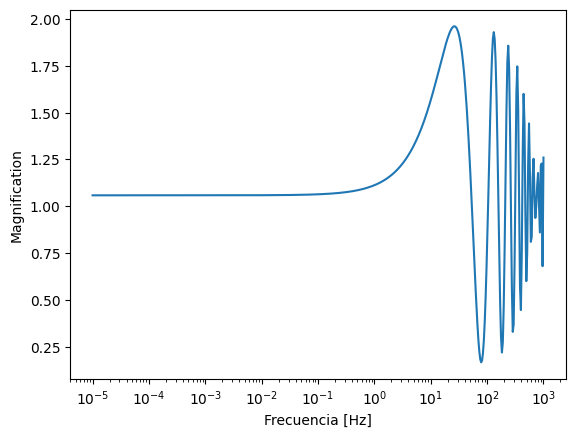

In [44]:
import matplotlib.pyplot as plt
plt.plot(dummy_frequencies,F)
plt.xscale('log')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnification')

In [9]:
# # This script illustrates how to use lensingGW's OnlyMacro feature to solve the macromodel of a binary point mass, assuming radians 

# import numpy as np

# # coordinates, first define them in scaled units [x (radians) /thetaE_tot]
# y0,y1 = 0.1,0.5*np.sqrt(3)   
# l0,l1 = 0.5,0  

# # redshifts                                                                                                                  
# zS = 2.0 
# zL = 0.5  

# # masses 
# mL1  = 100                                                                   
# mL2  = 100  
# mtot = mL1+mL2  

# # convert to radians
# from lensinggw.utils.utils import param_processing

# thetaE1 = param_processing(zL, zS, mL1)                                                                                                                              
# thetaE2 = param_processing(zL, zS, mL2)                                                                                                                              
# thetaE  = param_processing(zL, zS, mtot)    

# beta0,beta1 = y0*thetaE,y1*thetaE                                                 
# eta10,eta11 = l0*thetaE,l1*thetaE                                                                                                
# eta20,eta21 = -l0*thetaE,l1*thetaE  

# # lens model
# lens_model_list     = ['POINT_MASS', 'POINT_MASS'] 
# kwargs_point_mass_1 = {'center_x': eta10,'center_y': eta11, 'theta_E': thetaE1} 
# kwargs_point_mass_2 = {'center_x': eta20,'center_y': eta21, 'theta_E': thetaE2} 
# kwargs_lens_list    = [kwargs_point_mass_1, kwargs_point_mass_2]   

# # solve for the macromodel only with the OnlyMacro option: indicate both lenses as macromodel
# from lensinggw.solver.images import microimages

# solver_kwargs = {'OnlyMacro'        : True,
#                  'SearchWindowMacro': 4*thetaE1,
#                  'MacroIndex'       : [0,1]} 
                 
# MacroImg_ra, MacroImg_dec, pixel_width  = microimages(source_pos_x    = beta0,
#                                                       source_pos_y    = beta1,
#                                                       lens_model_list = lens_model_list,
#                                                       kwargs_lens     = kwargs_lens_list,
#                                                       **solver_kwargs)                                                          
                                                                       
# # time delays, magnifications, Morse indices and amplification factor
# from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
# from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

# tds = TimeDelay(MacroImg_ra, MacroImg_dec,
#                 beta0, beta1,
#                 zL, zS,
#                 lens_model_list, kwargs_lens_list)                
# mus = magnifications(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list)
# ns  = getMinMaxSaddle(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list) 
                
# print('Time delays (seconds): ', tds)
# print('magnifications: ',  mus)
# print('Morse indices: ',ns)

In [10]:
# # This script illustrates how to use lensingGW to solve a binary point mass lens model, assuming scaled units

# import numpy as np

# # coordinates in scaled units [x (radians) /thetaE_tot]
# y0,y1 = 0.1,0.5*np.sqrt(3)   
# l0,l1 = 0.5,0  

# # redshifts                                                                                                                  
# zS = 2.0 
# zL = 0.5  

# # masses 
# mL1  = 100                                                                   
# mL2  = 100  
# mtot = mL1+mL2  

# # compute the scale factor and the individual Einstein radii
# from lensinggw.utils.utils import param_processing                                                                                                                        
# thetaE  = param_processing(zL, zS, mtot)  
# thetaE1 = param_processing(zL, zS, mL1)                                                                                                                              
# thetaE2 = param_processing(zL, zS, mL2) 

# # lens model, give all input in scaled units
# lens_model_list            = ['POINT_MASS', 'POINT_MASS'] 
# kwargs_point_mass_1_scaled = {'center_x': l0,'center_y': l1, 'theta_E': thetaE1/thetaE}  # convert thetaE1 from radians to scaled units
# kwargs_point_mass_2_scaled = {'center_x': -l0,'center_y': l1, 'theta_E': thetaE2/thetaE} # convert thetaE2 from radians to scaled units
# kwargs_lens_list_scaled    = [kwargs_point_mass_1_scaled, kwargs_point_mass_2_scaled]  

# # indicate the first lens as macromodel and solve with the two-step procedure, give all input in scaled units
# from lensinggw.solver.images import microimages

# solver_kwargs_scaled = {'Scaled'           : True,   # indicate that the input is in scaled units 
#                         'ScaleFactor'      : thetaE, # and the scale factor  
#                         'SearchWindowMacro': 4*thetaE1/thetaE, # convert search windows from radians to scaled units
#                         'SearchWindow'     : 4*thetaE2/thetaE} # convert search windows from radians to scaled units  

# Img_ra_scaled, Img_dec_scaled, MacroImg_ra_scaled, MacroImg_dec_scaled, pixel_width  = microimages(source_pos_x    = y0,
#                                                                                                    source_pos_y    = y1,
#                                                                                                    lens_model_list = lens_model_list,
#                                                                                                    kwargs_lens     = kwargs_lens_list_scaled,
#                                                                                                    **solver_kwargs_scaled)                                                            
                                                                       
# # time delays, magnifications, Morse indices and amplification factor
# from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
# from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

# tds = TimeDelay(Img_ra_scaled, Img_dec_scaled,
#                 y0, y1,
#                 zL, zS,
#                 lens_model_list, kwargs_lens_list_scaled,
#                 scaled       = solver_kwargs_scaled['Scaled'],      # indicate that the input is in scaled units 
#                 scale_factor = solver_kwargs_scaled['ScaleFactor']) # and the scale factor              
# mus = magnifications(Img_ra_scaled, Img_dec_scaled, lens_model_list, kwargs_lens_list_scaled)
# ns  = getMinMaxSaddle(Img_ra_scaled, Img_dec_scaled, lens_model_list, kwargs_lens_list_scaled) 
                
# print('Time delays (seconds): ', tds)
# print('magnifications: ',  mus)
# print('Morse indices: ',ns)

# dummy_frequencies = np.linspace(0,10,11)
# F = geometricalOpticsMagnification(dummy_frequencies,
#                                    Img_ra_scaled,Img_dec_scaled,
#                                    y0,y1,
#                                    zL,zS,
#                                    lens_model_list,
#                                    kwargs_lens_list_scaled,
#                                    scaled       = solver_kwargs_scaled['Scaled'],      # indicate that the input is in scaled units 
#                                    scale_factor = solver_kwargs_scaled['ScaleFactor']) # and the scale factor   

# print('Geometrical optics amplification factor:', F)

In [11]:
# # This script illustrates how to use lensingGW to solve a binary point mass lens model, assuming scaled units

# import numpy as np

# # coordinates in scaled units [x (radians) /thetaE_tot]
# y0,y1 = 0.1,0.5*np.sqrt(3)   
# l0,l1 = 0.5,0  

# # redshifts                                                                                                                  
# zS = 2.0 
# zL = 0.5  

# # masses 
# mL1  = 100                                                                   
# mL2  = 100  
# mtot = mL1+mL2  

# # compute the scale factor and the individual Einstein radii
# from lensinggw.utils.utils import param_processing                                                                                                                        
# thetaE  = param_processing(zL, zS, mtot)  
# thetaE1 = param_processing(zL, zS, mL1)                                                                                                                              
# thetaE2 = param_processing(zL, zS, mL2) 

# # lens model, give all input in scaled units
# lens_model_list            = ['POINT_MASS', 'POINT_MASS'] 
# kwargs_point_mass_1_scaled = {'center_x': l0,'center_y': l1, 'theta_E': thetaE1/thetaE}  # convert thetaE1 from radians to scaled units
# kwargs_point_mass_2_scaled = {'center_x': -l0,'center_y': l1, 'theta_E': thetaE2/thetaE} # convert thetaE2 from radians to scaled units
# kwargs_lens_list_scaled    = [kwargs_point_mass_1_scaled, kwargs_point_mass_2_scaled]  

# # indicate the first lens as macromodel and solve with the two-step procedure, give all input in scaled units
# from lensinggw.solver.images import microimages

# solver_kwargs_scaled = {'Scaled'           : True,   # indicate that the input is in scaled units 
#                         'ScaleFactor'      : thetaE, # and the scale factor  
#                         'SearchWindowMacro': 4*thetaE1/thetaE, # convert search windows from radians to scaled units
#                         'SearchWindow'     : 4*thetaE2/thetaE} # convert search windows from radians to scaled units  

# Img_ra_scaled, Img_dec_scaled, MacroImg_ra_scaled, MacroImg_dec_scaled, pixel_width  = microimages(source_pos_x    = y0,
#                                                                                                    source_pos_y    = y1,
#                                                                                                    lens_model_list = lens_model_list,
#                                                                                                    kwargs_lens     = kwargs_lens_list_scaled,
#                                                                                                    **solver_kwargs_scaled)                                                            
                                                                       
# # time delays, magnifications, Morse indices and amplification factor
# from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
# from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

# tds = TimeDelay(Img_ra_scaled, Img_dec_scaled,
#                 y0, y1,
#                 zL, zS,
#                 lens_model_list, kwargs_lens_list_scaled,
#                 scaled       = solver_kwargs_scaled['Scaled'],      # indicate that the input is in scaled units 
#                 scale_factor = solver_kwargs_scaled['ScaleFactor']) # and the scale factor              
# mus = magnifications(Img_ra_scaled, Img_dec_scaled, lens_model_list, kwargs_lens_list_scaled)
# ns  = getMinMaxSaddle(Img_ra_scaled, Img_dec_scaled, lens_model_list, kwargs_lens_list_scaled) 
                
# print('Time delays (seconds): ', tds)
# print('magnifications: ',  mus)
# print('Morse indices: ',ns)

# dummy_frequencies = np.linspace(0,10,11)
# F = geometricalOpticsMagnification(dummy_frequencies,
#                                    Img_ra_scaled,Img_dec_scaled,
#                                    y0,y1,
#                                    zL,zS,
#                                    lens_model_list,
#                                    kwargs_lens_list_scaled,
#                                    scaled       = solver_kwargs_scaled['Scaled'],      # indicate that the input is in scaled units 
#                                    scale_factor = solver_kwargs_scaled['ScaleFactor']) # and the scale factor   

# print('Geometrical optics amplification factor:', F)

In [12]:
# This script illustrates how to use lensingGW's unlensed waveform routines

from lensinggw.waveform.waveform import gw_signal

# read the waveform parameters
config_file = '/home/anibal/lensinggw/lensinggw/examples/ini_files/waveform_config.ini'

# instantiate the waveform model
waveform_model = gw_signal(config_file)

# compute the unlensed waveform polarizations, strains in the requested detectors and their frequencies
freqs, hp_tilde, hc_tilde, strain_dict = waveform_model.unlensed_gw()

# and their signal-to-noise-ratios
SNR_dict = waveform_model.unlensed_snr()

# access an unlensed strain
sH1 = strain_dict['H1']



---- Will simulate a signal with the following parameters ----

m1          --> 50.0
m2          --> 20.0
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.5
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.3
distance    --> 15521.788104196934
ra          --> 1.39e-11
dec         --> 1.2e-10
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /home/anibal/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Unlensed SNR in H1 = 1.57
Network SNR of the unlensed simulation 1.568573



/home/anibal/anaconda3/envs/strong_lensing/lib/python3.9/site-packages/lalsuite-7.25.2.dev20250204-py3.9-linux-x86_64.egg/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [13]:
# strain_dict['H1']

In [14]:
# plt.plot(freqs, hp_tilde)
# plt.plot(freqs, hc_tilde)
# plt.xscale('log')


In [45]:
# This script illustrates how to use lensingGW's lensed waveform routines
import numpy as np

######################
# lens configuration #
######################

# source position, in radians
beta0, beta1 = 1.38717585112603e-11, 1.2013295265914425e-10

# redshifts
zL, zS = 0.5, 2.0

# binary point mass lens model
lens_model_list     = ['POINT_MASS', 'POINT_MASS'] 
kwargs_point_mass_1 = {'center_x': 6.93587925563015e-11,'center_y': 0.0, 'theta_E': 9.808814510294364e-11} 
kwargs_point_mass_2 = {'center_x': -6.93587925563015e-11,'center_y': 0.0, 'theta_E': 9.808814510294364e-11} 
kwargs_lens_list    = [kwargs_point_mass_1, kwargs_point_mass_2]

# binary point mass images, in radians
ra  = np.array([2.06184855e-11,  6.74286421e-11, -8.55036309e-11])
dec = np.array([2.04174704e-10, -6.17971410e-11, -5.67605886e-11])

####################
# lensed waveforms #
####################

from lensinggw.waveform.waveform import gw_signal

# read the waveform parameters
# config_file = 'ini_files/waveform_config.ini'

# instantiate the waveform model
waveform_model = gw_signal(config_file)

# compute the lensed waveform polarizations, strains in the requested detectors and their frequencies
freqs_lensed, hp_tilde_lensed, hc_tilde_lensed, lensed_strain_dict = waveform_model.lensed_gw(ra,dec,
                                                                                              beta0,beta1,
                                                                                              zL, zS,
                                                                                              lens_model_list,
                                                                                              kwargs_lens_list)

# and their signal-to-noise-ratios
lensed_SNR_dict = waveform_model.lensed_snr(ra,dec,
                                            beta0,beta1,
                                            zL, zS,
                                            lens_model_list,
                                            kwargs_lens_list)


# access a lensed strain
lensed_sH1 = lensed_strain_dict['H1']


---- Will simulate a signal with the following parameters ----

m1          --> 50.0
m2          --> 20.0
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.5
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.3
distance    --> 15521.788104196934
ra          --> 1.39e-11
dec         --> 1.2e-10
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /home/anibal/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Lensed SNR in H1 = 2.32
Network SNR of the lensed simulation 2.315061



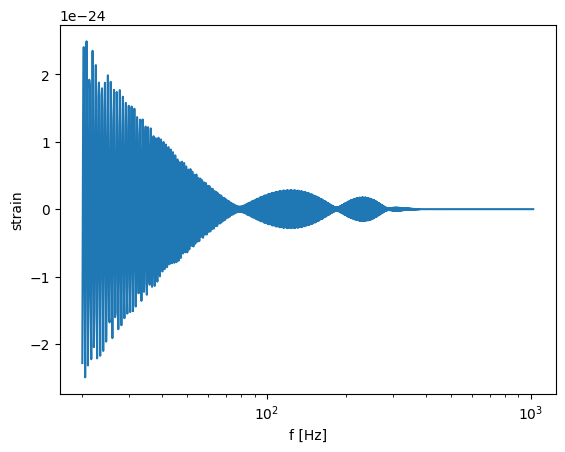

In [47]:
plt.plot(freqs_lensed, lensed_strain_dict['H1'])
plt.xlabel('f [Hz]')
plt.ylabel('strain')
plt.xscale("log")

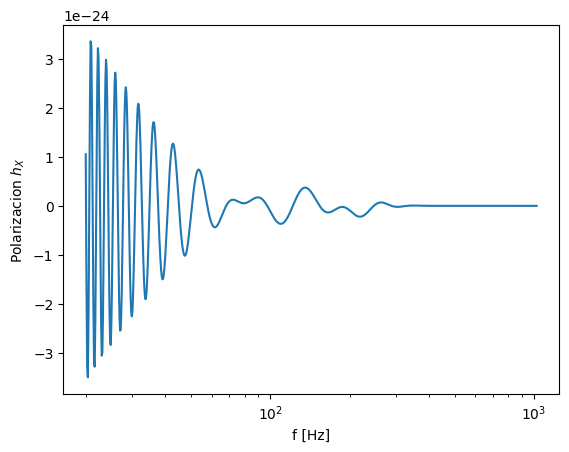

In [42]:
plt.plot(freqs_lensed , hc_tilde_lensed)
plt.xlabel('f [Hz]')
plt.ylabel(r'Polarizacion $h_{X}$')
plt.xscale("log")

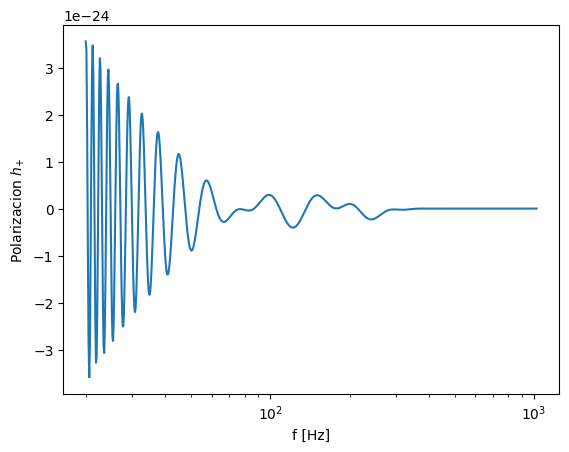

In [43]:
plt.plot(freqs_lensed, hp_tilde_lensed) 
plt.xlabel('f [Hz]')
plt.ylabel(r'Polarizacion $h_{+}$')
plt.xscale("log")

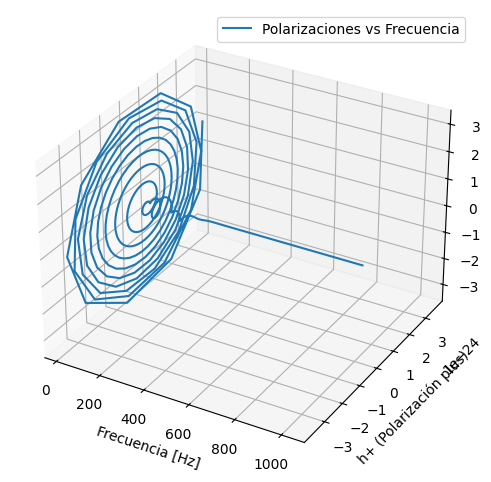

In [38]:
# Crear figura y ejes 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax.plot(freqs_lensed, hp_tilde_lensed, hc_tilde_lensed, label='Polarizaciones vs Frecuencia')

# Etiquetas de los ejes
ax.set_xlabel('Frecuencia [Hz]')
ax.set_ylabel('h+ (Polarización plus)')
ax.set_zlabel('hx (Polarización cruz)')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [11]:
# print(abs(freqs_lensed[0]-freqs_lensed[1]))
# print(freqs_lensed[-1])
# print(1/8)

In [12]:
# magnifications(ra, dec, lens_model_list, kwargs_lens_list, diff=None)

In [13]:
# freqs_lensed

In [14]:
# np.abs(hp_tilde_lensed + 1j * hc_tilde_lensed)

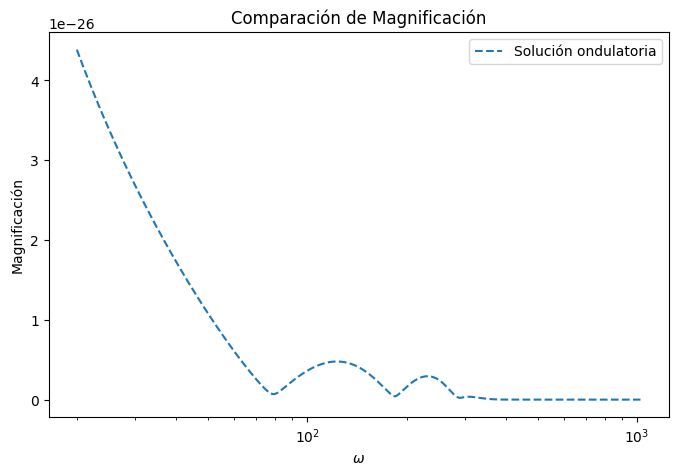

In [15]:
# magnification_wave = np.abs(geometrical_optics_amplification)
magnification_wave = np.abs(hp_tilde_lensed + 1j * hc_tilde_lensed)

# Frecuencia como ejemplo (ajustar según el código original)
# omega = np.linspace(1, 3, len(magnification_wave))  # Simulación de valores de omega

# Graficar la comparación
plt.figure(figsize=(8, 5))
plt.plot(freqs_lensed, magnification_wave, label="Solución ondulatoria", linestyle='dashed')
# plt.axhline(magnification_geom, color='r', linestyle='dotted', label="Aproximación geométrica")
plt.xlabel(r"$\omega$")
plt.ylabel("Magnificación")
plt.xscale("log")
plt.legend()
plt.title("Comparación de Magnificación")
plt.show()

In [4]:
from astropy.constants import c, G, M_sun
from astropy import units as u

def longitud_onda_gravitacional(frecuencia):
    frecuencia = frecuencia * u.Hz
    longitud_onda = (c / frecuencia).to(u.m)  # Convertir a metros
    return longitud_onda

def masa_schwarzschild(longitud_onda):
    masa = (longitud_onda * c**2 / (2 * G)).to(u.kg)  # Convertir a kg
    return masa

def masa_en_masas_solares(masa):
    return (masa / M_sun).to(u.dimensionless_unscaled)  # Convertir a masas solares

# Ejemplo de uso
frecuencia = 10  # Hz
longitud_onda = longitud_onda_gravitacional(frecuencia)
masa = masa_schwarzschild(longitud_onda)
masa_solar = masa_en_masas_solares(masa)

print(f"Para una frecuencia de {frecuencia} Hz, la longitud de onda es {longitud_onda:.2e}.")
print(f"La masa que produce un radio de Schwarzschild de la misma magnitud es {masa:.2e}.")
print(f"Esto equivale a aproximadamente {masa_solar:.2e} masas solares.")

Para una frecuencia de 10 Hz, la longitud de onda es 3.00e+07 m.
La masa que produce un radio de Schwarzschild de la misma magnitud es 2.02e+34 kg.
Esto equivale a aproximadamente 1.02e+04 masas solares.


In [46]:
lensed_SNR_dict

{'H1': 2.3150614734390005, 'network': 2.3150614734390005}